<a href="https://colab.research.google.com/github/raulc27/python_testes/blob/master/Apostila2_BootCampPython(pandas_scikitlearn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas
import numpy as np
import pandas as pd

In [ ]:
# leitura dos dados
df = pd.read_csv("https://pycourse.s3.amazonaws.com/temperature.csv")

In [ ]:
df.head(3)

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente


In [ ]:
# transformando o tipo da coluna date para datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# setando o índice
df = df.set_index('date')

In [ ]:
#visualizando o índice
print(df.index)

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', name='date', freq=None)


In [ ]:
# estatísticas básicas de dados numéricos
df.describe()

,temperatura
count,6.000000
mean,26.800000
std,4.075782
min,20.000000
25%,25.000000
50%,28.250000
75%,28.950000
max,31.200000


In [ ]:
# indexação por índice selecionado todas as linhas
# e a coluna 1
# coluna 1: temperatura
df.iloc[:, 1]

date
2020-01-01          quente
2020-02-01    muito quente
2020-03-01          quente
2020-04-01          quente
2020-05-01     confortavel
2020-06-01            frio
Name: classification, dtype: object

In [ ]:
# indexação por nome
# selecionado todas as linhas e a coluna 1
df.loc[:, 'temperatura']

date
2020-01-01    29.1
2020-02-01    31.2
2020-03-01    28.5
2020-04-01    28.0
2020-05-01    24.0
2020-06-01    20.0
Name: temperatura, dtype: float64

In [ ]:
# ordenando por uma coluna
df.sort_values(by='temperatura')

,temperatura,classification
date,,
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente


In [ ]:
# ordenando pelo índice
df.sort_index(ascending=False)

,temperatura,classification
date,,
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-02-01,31.2,muito quente
2020-01-01,29.1,quente


In [ ]:
# indexação booleana
# seleção de exemplos acima de 25 graus
df[df['temperatura']>=25]

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente


In [ ]:
# indexação booleana considerando datetime
# seleção de entradas até MArço de 2020
df[df.index<='2020-03-01']

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente


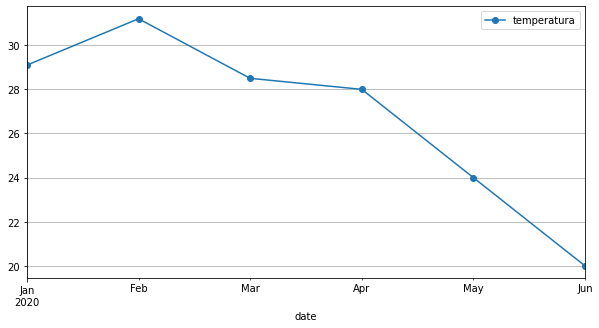

In [ ]:
# plot de linhas
df.plot(style='-o', figsize=(10,5), grid=True);

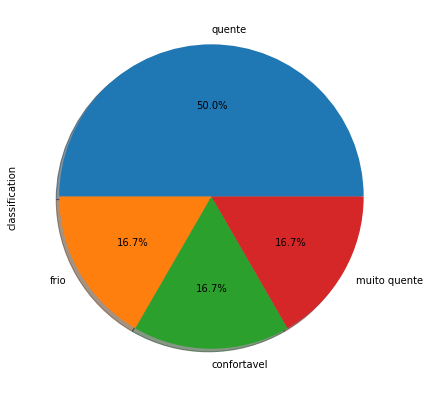

In [ ]:
# pie plot
df['classification'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(10,7));

# SCIKIT LEARN

In [17]:
# extraçao de x e y
x,y=df[['temperatura']].values, df[['classification']].values
print("x:\n", x)
print("y:\n", y)

x:
 [[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]]
y:
 [['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']]


In [18]:
# pré-processamento
from sklearn.preprocessing import LabelEncoder

In [19]:
# conversão de y para valores numéricos
le = LabelEncoder()
y = le.fit_transform(y.ravel())
print("y:\n",y)

y:
 [3 2 3 3 0 1]


In [20]:
# modelo
from sklearn.linear_model import LogisticRegression

In [21]:
# classificador
clf = LogisticRegression()
clf.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# gerando 100 valores de temperatura
# linearmente espaçados entre 0 e 45
# predição em novos valores de temperatura
x_test = np.linspace(start=0.,stop=45.,num=100).reshape(-1,1)

# predição desses valores
y_pred = clf.predict(x_test)

In [26]:
# conversão de y_pred para os valores originais
y_pred = le.inverse_transform(y_pred)

In [27]:
# output
output = { 'new_temp': x_test.ravel(), 'new_class': y_pred.ravel()}
output = pd.DataFrame(output)

In [28]:
# estatísticas
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   new_temp   100 non-null    float64
 1   new_class  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


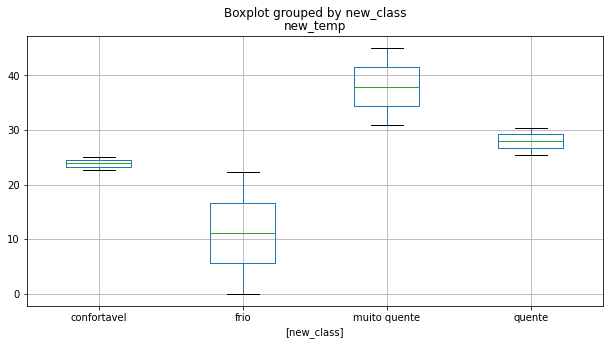

In [29]:
# Distribuição do outoput produzido
# conseguimos inferir a classificação novas temperaturas
# a partir de um dataset com 6 exemplos
output.boxplot(by='new_class', figsize=(10,5))